<h1><center> Amazon Review Prediction using spaCy</center></h1>

## The Amazon Review Prediction Using SpaCy, presentation by, Dharmatej Vayineni, Mohan Rao Gurram
delves into the Name Entity Recognition. With a dataset comprising 3150 records detailing verified reviews 
of customers who bought on amazon, the analysis combines both qualitative and quantitative aspect
including rating, date, variation, verified reviews, feedback.
This project focused on NER of Amazon Alexa reviews using natural language 
processing (NLP) techniques, with a primary emphasis on leveraging the SpaCy library. Amazon Alexa, a 
popular voice-controlled virtual assistant, accumulates a vast array of user feedback, making 
analysis by SPACY for product improvement and marketing strategies.

## SpaCy is a powerful library for linguistic data processing. It provides a pipeline of processing components: a tokenizer, a part-of-speech tagger, a dependency parser and a named-entity recognizer.


## import libraries

In [1]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

## Load dataset

In [2]:
import pandas as pd

# file path
file = "C:/Users/dharm/Downloads/amazon_alexa (1).tsv"

# Read the TSV file
df = pd.read_csv(file, sep='\t')

# Display the first 10 rows
print(df.head(10))


   rating       date             variation  \
0       5  31-Jul-18      Charcoal Fabric    
1       5  31-Jul-18      Charcoal Fabric    
2       4  31-Jul-18        Walnut Finish    
3       5  31-Jul-18      Charcoal Fabric    
4       5  31-Jul-18      Charcoal Fabric    
5       5  31-Jul-18  Heather Gray Fabric    
6       3  31-Jul-18     Sandstone Fabric    
7       5  31-Jul-18      Charcoal Fabric    
8       5  30-Jul-18  Heather Gray Fabric    
9       5  30-Jul-18  Heather Gray Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  
5  I received the echo as a gift. I needed anothe...         1  
6  Without having a cellphone, I canno

## intstall spacy

In [3]:
!pip install spacy

In [4]:
!python -m spacy download en

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 901.1 kB/s eta 0:00:15
     - -------------------------------------- 0.4/12.8 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.2/12.8 MB 5.3 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 6.3 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.8 MB 7.1 MB/s eta 0:00:02
     --------- ------------------------------ 3.0/12.8 MB 8.0 MB/s eta 0:00:02
     --------- ------------------------------ 3.2/12.8 MB 7.5 MB/s eta 0:00:02
     ------------ --------------------------- 4.0/12.8 MB 8.6 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 8.9 MB/s eta 0:00:01
     ------------- -------------------------- 4.2/12.8 MB 8.9 MB

## Load the English model

In [5]:
import spacy
import numpy as np  # linear algebra
import pandas as pd  # data processing, tSV file I/O (e.g. pd.read_csv)

# Load the English model
nlp = spacy.load('en_core_web_sm')


In [6]:
#reading the tsv file
data = pd.read_csv('C:/Users/dharm/Downloads/amazon_alexa (1).tsv', delimiter = '\t', quoting = 3)

In [7]:
#display data
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
#number of rows and columns present in the dataset.
data.shape


(3150, 5)

## displaying few rows of column 'variation'

In [9]:
data["variation"].head()

0    Charcoal Fabric 
1    Charcoal Fabric 
2      Walnut Finish 
3    Charcoal Fabric 
4    Charcoal Fabric 
Name: variation, dtype: object

## Word level attributes :

## access the content of a variable 'txt'

In [10]:
txt = data["verified_reviews"][1009]
txt

'Bought this for my daughter when she turned 9.  She loves it!!  I especially like the calling feature since she doesn’t have a cell phone.  She loves playing music and dancing and with Amazon music she can play all her favorite songs ...... sometimes over and over and over again lol!'

### assessing the distribution and range of values within each column

In [11]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [12]:
#to see any null data is there
data.isnull().any().any()

True

## What are the attributes that SpaCy adds?

### This function allows for easy visualization and analysis of spaCy token attributes by organizing them into a pandas DataFrame, facilitating further exploration and manipulation of the token data.








In [34]:
import pandas as pd

def display_nlp(doc, include_punct=False):
    """Generate data frame for visualization of spaCy tokens."""
    rows = []
    for i, t in enumerate(doc):
        if not t.is_punct or include_punct:
            row = {'token': i,  'text': t.text, 'lemma_': t.lemma_, 
                   'is_stop': t.is_stop, 'is_alpha': t.is_alpha,
                   'pos_': t.pos_, 'dep_': t.dep_, 
                   'ent_type_': t.ent_type_, 'ent_iob_': t.ent_iob_}
            rows.append(row)
    
    df = pd.DataFrame(rows).set_index('token')
    df.index.name = None
    return df
display_nlp(doc) 


,text,lemma_,is_stop,is_alpha,pos_,dep_,ent_type_,ent_iob_
0,No,no,True,True,INTJ,neg,,O
1,different,different,False,True,ADJ,ROOT,,O
2,than,than,True,True,ADP,prep,,O
3,Apple,Apple,False,True,PROPN,pobj,ORG,B
5,To,to,True,True,PART,aux,,O
6,play,play,False,True,VERB,advcl,,O
7,a,a,True,True,DET,det,,O
8,specific,specific,False,True,ADJ,amod,,O
9,list,list,False,True,NOUN,dobj,,O
10,of,of,True,True,ADP,prep,,O


### Here we extracts various attributes for each token, and organizes these attributes into a pandas DataFrame for further analysis and visualization.








In [35]:
doc = nlp(txt)    
olist = []
for token in doc:
    l = [token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_]
    olist.append(l)
    
odf = pd.DataFrame(olist)
odf.columns= ["Text", "StartIndex", "Lemma", "IsPunctuation", "IsSpace", "WordShape", "PartOfSpeech", "POSTag"]
odf

,Text,StartIndex,Lemma,IsPunctuation,IsSpace,WordShape,PartOfSpeech,POSTag
0,Bought,0,buy,False,False,Xxxxx,VERB,VBD
1,this,7,this,False,False,xxxx,PRON,DT
2,for,12,for,False,False,xxx,ADP,IN
3,my,16,my,False,False,xx,PRON,PRP$
4,daughter,19,daughter,False,False,xxxx,NOUN,NN
5,when,28,when,False,False,xxxx,SCONJ,WRB
6,she,33,she,False,False,xxx,PRON,PRP
7,turned,37,turn,False,False,xxxx,VERB,VBD
8,9,44,9,False,False,d,NUM,CD
9,.,45,.,True,False,.,PUNCT,.


The function "nlp" on the text column gets us a lot of information. The details are as follows:

Text - Tokenized word

StartIndex - Index at which the word starts in the sentence

Lemma - Lemma of the word (we need not do lemmatization separately)

IsPunctuation - Whether the given word is a punctuation or not

IsSpace - Whether the given word is just a white space or not

WordShape - Gives information about the shape of word (If all letters are in upper case, we will get XXXXX, if all in lower case then xxxxx, if the first letter is upper and others lower then Xxxxx and so on)

PartOfSpeech - Part of speech of the word

POSTag - Tag for part of speech of word

## Named Entity Recognition (NER )

A named entity is a "real-world object" that's assigned a name – for example, a person, a country, a product or a book title.

We also get named entity recognition as part of spacy package. It is inbuilt in the english language model and we can also train our own entities if needed

### This code extracts named entities along with their types using spaCy, and organizes this information into a pandas DataFrame for further analysis or visualization.








In [36]:
doc = nlp(txt)
olist = []
for ent in doc.ents:
    olist.append([ent.text, ent.label_])
    
odf = pd.DataFrame(olist)
odf.columns = ["Text", "EntityType"]
odf

,Text,EntityType
0,9,DATE
1,Amazon,ORG


## Visualize NERS:

###  This code processes a series of text sentences, identifies named entities in each sentence, prints information about those entities, and finally visualizes the named entities in the last processed sentence.








In [37]:
from spacy import displacy
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
for i in range(15, 50):
    one_sentence = data['verified_reviews'][i]
    doc = nlp(one_sentence)
displacy.render(doc, style='ent', jupyter=True)

## Sentence dependency tree

### This visualization helps in understanding the syntactic structure of the text, showing the relationships between words in terms of their grammatical roles and dependencies

In [38]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

## Word Similarity
Spacy has word vector model as well. So we can use the same to find similar words.

In [39]:
nlp = spacy.load('en_core_web_lg')

Now we can use the cosine similarity to find the words that are similar to the word "Love"

In [40]:
from scipy import spatial

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

love = nlp.vocab['love'].vector
computed_similarities = []
for word in nlp.vocab:
    # Ignore words without vectors
    if not word.has_vector:
        continue
    similarity = cosine_similarity(love, word.vector)
    computed_similarities.append((word, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])
print([w[0].text for w in computed_similarities[:10]])

['love', 'lovin’', 'lovin', "lovin'", 'you', 'somethin’', 'what', '’cause', 'this', 'somethin']


### Use spaCy to calculate the similarity between word vectors for different pairs of words, providing insight into their semantic similarity or relatedness.








In [41]:
queen = nlp.vocab['love']
happy = nlp.vocab['happy']
fun = nlp.vocab['fun']
kids = nlp.vocab['kids']
king = nlp.vocab['King']
 
print("Word similarity score between love and happy : ",queen.similarity(happy))
print("Word similarity score between love and funn : ",queen.similarity(fun))

Word similarity score between love and happy :  0.5778762698173523
Word similarity score between love and funn :  0.5078396797180176


## Data Visualization

### This code snippet generates an interactive pie chart visualizing the distribution of ratings for Alexa products using Plotly. Each slice of the pie represents a unique rating, with the size of the slice indicating the proportion of products with that rating

In [42]:
import plotly.graph_objs as go
import plotly.offline as py

ratings = data['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

# Define colors for the pie chart slices
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink']

rating_piechart = go.Pie(labels=label_rating,
                         values=size_rating,
                         marker=dict(colors=colors),
                         name='Alexa', hole=0.3)

df = [rating_piechart]

layout = go.Layout(
           title='Distribution of Ratings for Alexa')

fig = go.Figure(data=df,
                layout=layout)

py.iplot(fig)


By looking at the above pie chart, we can infer that most of the Ratings are good for alexa. Around 72.6% people have given Alexa 5 Star rating, which is very good. 14.4% people have given Alexa a 4 Star Rating, which is also good. that means 72.6+14.4 = 87% people have given alexa good rating.

4.38% people have given alexa an average rating of 3 stars. 3.05% people did not like alexa and chose to give only 2 star ratings to alexa whereas 5.11% people hated alexa and decided to give alexa only 1 Star Rating. This a total of 3.05+5.11 = 8.16% people did not like alexa.

In [43]:
import plotly.graph_objs as go
import plotly.offline as py

feedbacks = data['feedback'].value_counts()

label_feedback = feedbacks.index
size_feedback = feedbacks.values

# Define colors for the pie chart slices
colors = ['lightblue', 'lightgreen']

feedback_piechart = go.Pie(labels=label_feedback,
                           values=size_feedback,
                           marker=dict(colors=colors),
                           name='Alexa', hole=0.3)

df2 = [feedback_piechart]

layout = go.Layout(title='Distribution of Feedbacks for Alexa')

fig = go.Figure(data=df2, layout=layout)

py.iplot(fig)


Here again we are going to analyze the Pie Chart representing the Distribution of feedback for Amazon Alexa which says that around 92% people gave a positive feedback to Amazon Alexa and only 8% people gave negative feedback to Amazon Alexa. This Suggests that Amazon Alexa is a popular product amongst so many people and only few people did not like it for some unforeseeable factors.

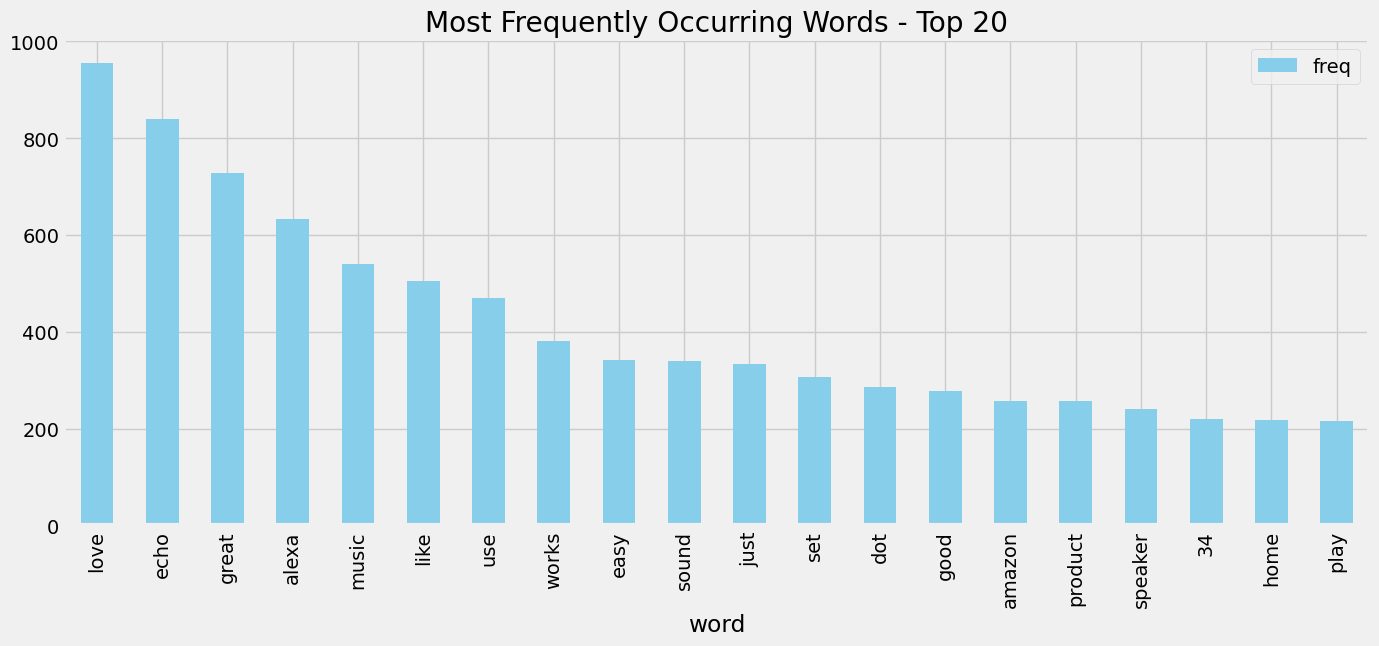

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Drop rows with missing values in the 'verified_reviews' column
data.dropna(subset=['verified_reviews'], inplace=True)

# Initialize CountVectorizer
cv = CountVectorizer(stop_words='english')

# Fit and transform the 'verified_reviews' column
words = cv.fit_transform(data['verified_reviews'])

# Sum up the occurrences of each word
sum_words = words.sum(axis=0)

# Get word frequencies
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]

# Sort words by frequency
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Create a DataFrame for word frequencies
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Plotting
plt.style.use('fivethirtyeight')
color = 'skyblue'  # Specify the color here
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color=color)
plt.title("Most Frequently Occurring Words - Top 20")
plt.show()


he Above Bar plot represents the most frequnt words in the reviews so that we can get a rough idea about the reviews and what people think of the product.

We can see that love is the most frequent word in the word suggesting that most of the people absolutely love alexa. Other frequent words that suggest alexa is doing well are amazing, like, great, works etc

# wordcloud
### Plotting a wordscloud for the Words to see all the words, The Larger the words the larger is the frequency for that word.
### The size of each word in the word cloud corresponds to its frequency in the corpus, with more frequent words appearing larger.

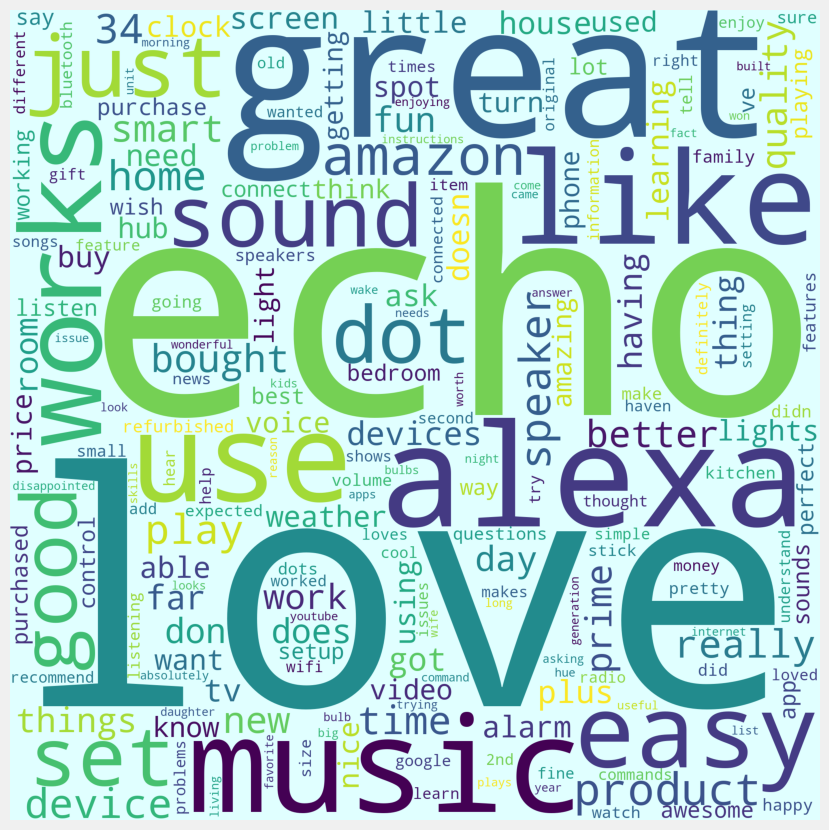

In [45]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

#plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
#plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

### This code snippet calculates the lengths of the 'verified_reviews' in the DataFrame, adds this information as a new column named 'length', groups the data by the lengths, and then calculates descriptive statistics (such as count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum) for each group.

In [46]:
data['length'] = data['verified_reviews'].apply(len)

data.groupby('length').describe().sample(10)

rating                                                feedback         \
        count      mean       std  min   25%  50%   75%  max    count   mean   
length                                                                         
271       2.0  1.500000  0.707107  1.0  1.25  1.5  1.75  2.0      2.0  0.000   
205       7.0  4.714286  0.487950  4.0  4.50  5.0  5.00  5.0      7.0  1.000   
117       8.0  3.000000  1.414214  1.0  1.75  4.0  4.00  4.0      8.0  0.625   
184       2.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      2.0  1.000   
152       9.0  4.333333  0.707107  3.0  4.00  4.0  5.00  5.0      9.0  1.000   
551       2.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      2.0  1.000   
1956      1.0  3.000000       NaN  3.0  3.00  3.0  3.00  3.0      1.0  1.000   
145       5.0  4.600000  0.547723  4.0  4.00  5.0  5.00  5.0      5.0  1.000   
64       13.0  4.692308  0.480384  4.0  4.00  5.0  5.00  5.0     13.0  1.000   
52       13.0  4.692308  0.751068  3.0  5.00  5.0  5.00  5.0     13.0  1.000   

                                           
             std  min  25%  50%  75%  max  
length                                     
271     0.000000  0.0  0.0  0.0  0.0  0.0  
205     0.000000  1.0  1.0  1.0  1.0  1.0  
117     0.517549  0.0  0.0  1.0  1.0  1.0  
184     0.000000  1.0  1.0  1.0  1.0  1.0  
152     0.000000  1.0  1.0  1.0  1.0  1.0  
551     0.000000  1.0  1.0  1.0  1.0  1.0  
1956         NaN  1.0  1.0  1.0  1.0  1.0  
145     0.000000  1.0  1.0  1.0  1.0  1.0  
64      0.000000  1.0  1.0  1.0  1.0  1.0  
52      0.000000  1.0  1.0  1.0  1.0  1.0

## coclusion
### Key Takeaways 
• Gaining profound insights into customer sentiments and their impact on product success. 

• Recognizing effective sentiment prediction models and emerging trends in customer feedback 
analysis.

• Fostering a deeper appreciation for the role of NLP in deciphering customer sentiments and 
enhancing product development strategies.

*The project on Amazon Review Prediction using SpaCy has provided valuable insights into 
customer sentiments towards Amazon Alexa products through the application of natural language 
processing (NLP) techniques.

*the Amazon Review Sentiment Prediction project using SpaCy underscores the importance 
of leveraging NLP techniques for analyzing user feedback and extracting meaningful insights from textual 
data. Through effective utilization of SpaCy and comprehensive data analysis, the project provides valuable 
implications for understanding customer sentiments and driving business decisions in the e-commerce 
domain.